In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [8]:
vehicle_dataset1 = pd.read_csv('./car data.csv')
vehicle_dataset2 = pd.read_csv('./CAR DETAILS FROM CAR DEKHO.csv')
vehicle_dataset3 = pd.read_csv('./Car details v3.csv')
vehicle_dataset4 = pd.read_csv('./car details v4.csv')

In [12]:
vehicle_dataset = pd.concat([vehicle_dataset1, vehicle_dataset2, vehicle_dataset3, vehicle_dataset4], axis=0)

In [16]:
print(vehicle_dataset.head())

  Car_Name    Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014.0           3.35           5.59     27000.0    Petrol   
1      sx4  2013.0           4.75           9.54     43000.0    Diesel   
2     ciaz  2017.0           7.25           9.85      6900.0    Petrol   
3  wagon r  2011.0           2.85           4.15      5200.0    Petrol   
4    swift  2014.0           4.60           6.87     42450.0    Diesel   

  Seller_Type Transmission Owner name  ...  Seller Type  Engine  Max Power  \
0      Dealer       Manual     0  NaN  ...          NaN     NaN        NaN   
1      Dealer       Manual     0  NaN  ...          NaN     NaN        NaN   
2      Dealer       Manual     0  NaN  ...          NaN     NaN        NaN   
3      Dealer       Manual     0  NaN  ...          NaN     NaN        NaN   
4      Dealer       Manual     0  NaN  ...          NaN     NaN        NaN   

  Max Torque Drivetrain Length Width Height Seating Capacity  \
0        NaN        Na

In [20]:
print(vehicle_dataset .describe())

              Year  Selling_Price  Present_Price     Kms_Driven          year  \
count  2360.000000     301.000000     301.000000     301.000000  12468.000000   
mean   2016.068644       4.661296       7.628472   36947.205980   2013.555743   
std       3.435772       5.082812       8.644115   38886.883882      4.118485   
min    1988.000000       0.100000       0.320000     500.000000   1983.000000   
25%    2014.000000       0.900000       1.200000   15000.000000   2011.000000   
50%    2016.000000       3.600000       6.400000   32000.000000   2014.000000   
75%    2018.000000       6.000000       9.900000   48767.000000   2017.000000   
max    2022.000000      35.000000      92.600000  500000.000000   2020.000000   

       selling_price     km_driven        seats         Price     Kilometer  \
count   1.246800e+04  1.246800e+04  7907.000000  2.059000e+03  2.059000e+03   
mean    5.915773e+05  6.856508e+04     5.416719  1.702992e+06  5.422471e+04   
std     7.377876e+05  5.333721e+0

In [38]:
print(vehicle_dataset.info())

<class 'pandas.core.frame.DataFrame'>
Index: 14828 entries, 0 to 2058
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Car_Name            301 non-null    object 
 1   Year                2360 non-null   float64
 2   Selling_Price       301 non-null    float64
 3   Present_Price       301 non-null    float64
 4   Kms_Driven          301 non-null    float64
 5   Fuel_Type           301 non-null    object 
 6   Seller_Type         301 non-null    object 
 7   Transmission        2360 non-null   object 
 8   Owner               2360 non-null   object 
 9   name                12468 non-null  object 
 10  year                12468 non-null  float64
 11  selling_price       12468 non-null  float64
 12  km_driven           12468 non-null  float64
 13  fuel                12468 non-null  object 
 14  seller_type         12468 non-null  object 
 15  transmission        12468 non-null  object 
 16  owner     

In [48]:
import seaborn as sns

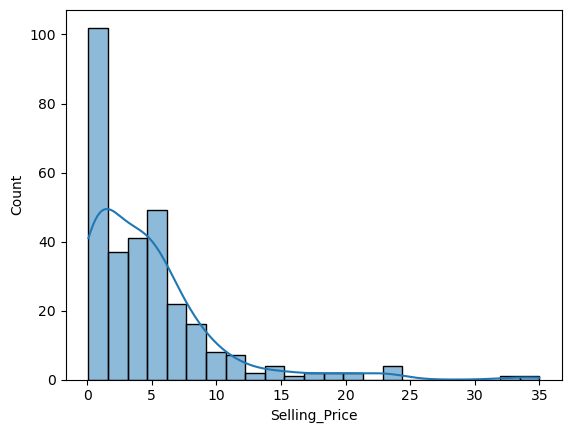

In [52]:
sns.histplot(vehicle_dataset['Selling_Price'], kde=True)
plt.show()

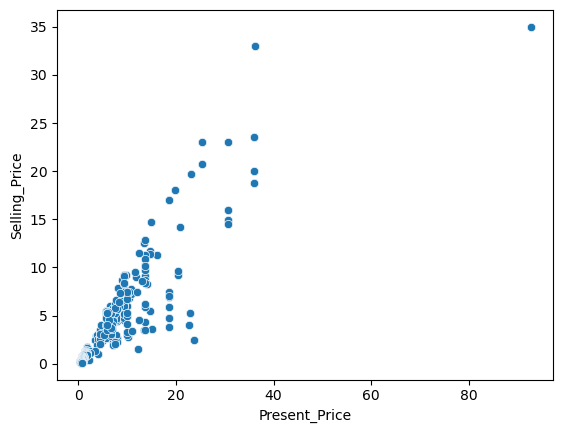

In [56]:
sns.scatterplot(x='Present_Price', y='Selling_Price', data=vehicle_dataset)
plt.show()

In [90]:
print(vehicle_dataset.isnull().sum())

Year                                 0
Selling_Price                        0
Present_Price                        0
Kms_Driven                           0
year                               301
                                  ... 
Max Torque_99.08 Nm @ 4500 rpm       0
Max Torque_99.081 Nm @ 4500 rpm      0
Max Torque_99@2800                   0
Drivetrain_FWD                       0
Drivetrain_RWD                       0
Length: 5833, dtype: int64


In [158]:
vehicle_dataset.fillna(vehicle_dataset.mean(), inplace=True)

In [162]:
from sklearn.feature_selection import SelectKBest, f_regression

In [166]:
X = vehicle_dataset.drop('Selling_Price', axis=1)
y = vehicle_dataset['Selling_Price']

In [170]:
selector = SelectKBest(f_regression, k=5)

In [174]:
X_new = selector.fit_transform(X, y)

In [178]:
print(X_new.shape)

(14828, 5)


In [182]:
from sklearn.model_selection import train_test_split

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [190]:
print (X_train)

[[5.9 0.  0.  1.  0. ]
 [5.9 0.  0.  1.  0. ]
 [5.9 0.  0.  1.  0. ]
 ...
 [5.9 0.  0.  1.  0. ]
 [5.9 0.  0.  1.  0. ]
 [5.9 0.  0.  1.  0. ]]


In [194]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [198]:
from sklearn.metrics import mean_squared_error, r2_score


In [202]:
y_pred = model.predict(X_test)

In [206]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [210]:
print(f'MSE: {mse}')
print(f'R^2: {r2}')

MSE: 0.11745334555390999
R^2: 0.7681825042278664


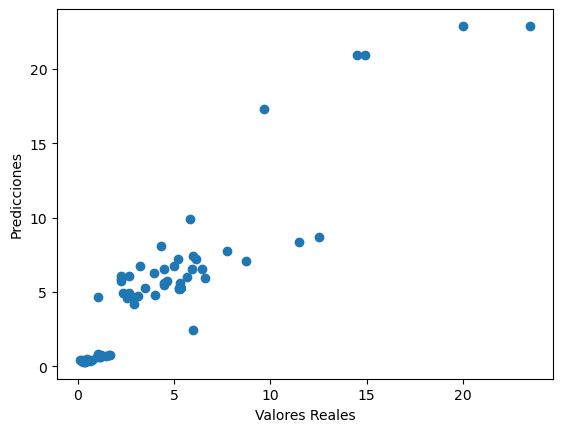

In [214]:
plt.scatter(y_test, y_pred)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.show()

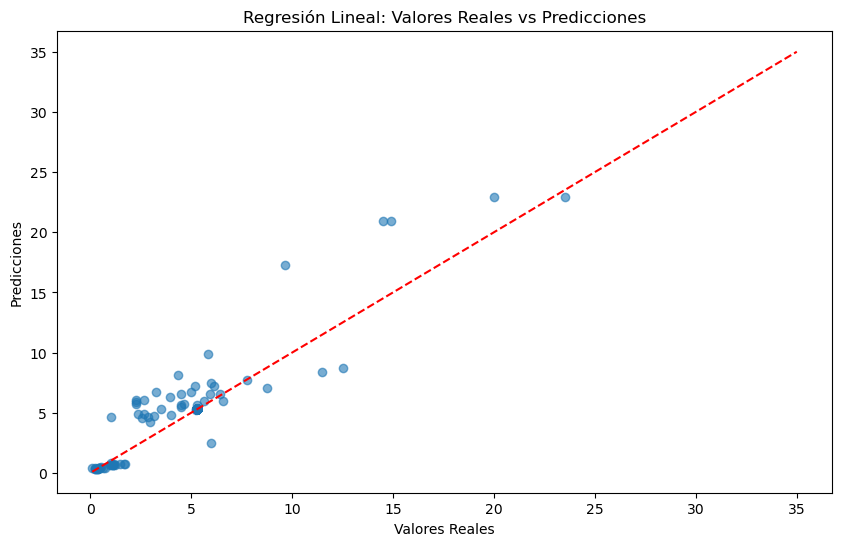

In [216]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Línea de referencia
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Regresión Lineal: Valores Reales vs Predicciones')
plt.show()